# RECCOMENDATION SYSTEM

# Business Objective:
Generate the features from the dataset and use them to recommend the books accordingly to the users.

LOADING LIBRARY

In [1]:
#SET 1 : DATA MANIPULATION AND ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#SET 2 : RECOMMENDATION SYSTEM SPECIFIC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine, correlation, jaccard
from PIL import Image

#SET 3 : WordCloud and STOPWORDS
from wordcloud import WordCloud,STOPWORDS

In [2]:
#SET 4 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''#SET 5 : GOOGLE COLLAB SPECIFIC
from google.colab import drive
drive.mount('/content/drive')'''



"#SET 5 : GOOGLE COLLAB SPECIFIC\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
# Loading dataset
books = pd.read_csv('Books.csv', encoding='Latin1')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings=pd.read_csv("Ratings.csv",encoding='Latin1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users=pd.read_csv("Users.csv",encoding='Latin1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# EDA - Exploratory data analysis
----
- data dictionary
- data cleaning
- variable analysis
- univariate analysis
- multivariate analysis
- correlation analysis
- statistical analysis
- required tranformations

DATASET 1 - BOOKS
----

DataSet analysis
- data size
- data type
- data shape

In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.shape

(271360, 8)

In [9]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [10]:
print('Number of Unique Book Authors are {}'.format(len(books['Book-Author'].unique())))

Number of Unique Book Authors are 102023


In [11]:
print('Number of Unique Books are {}'.format(len(books['Book-Title'].unique())))

Number of Unique Books are 242135


In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


DATA CLEANING
- missing/null values
- duplicates

In [13]:
books.isnull().any()

ISBN                   False
Book-Title             False
Book-Author             True
Year-Of-Publication    False
Publisher               True
Image-URL-S            False
Image-URL-M            False
Image-URL-L             True
dtype: bool

In [14]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [15]:
books.duplicated().sum()

0

DATASET 2 - USERS
----

In [16]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
users.shape

(278858, 3)

In [18]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [20]:
print('user unique geolocation : {}'.format(len(users['Location'].unique())))

user unique geolocation : 57339


In [21]:
# Missing values
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [22]:
# duplicate values
users.duplicated().sum()

0

Observations:

- user unique geolocation : 57339
- Age : so many missing vlaues
- measures taken for Age Attribute  : Drop
- difficult to perform recommendatios based on AGE of users

DATASET 3 - RATINGS
---

In [23]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
ratings.shape

(1149780, 3)

In [25]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [26]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [27]:
#  missing values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [28]:
# duplicate values
ratings.duplicated().sum()

0

In [29]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [30]:
#Ratings Frequency
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

observations:

- rating from : 0  to 10
- median : 0 (means more rating of 0) , not rated and filled with 0
- difficult to use Recommendation based on Ratings
- use **average ratings**

Overall:
- users/books have total 270k observations
- ratings have total 1.1mil observations

# DATA CLEANING

AGE


In [31]:
users['Age'] = users['Age'].fillna(users['Age'].median())

BOOKS

In [32]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [33]:
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


In [34]:
# id : 2070426769
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [35]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

RATINGS

In [36]:
ratings= ratings[ratings['Book-Rating'] != 0]

# Data Visualization
----

RATINGS

Text(0.5, 1.0, 'Ratings')

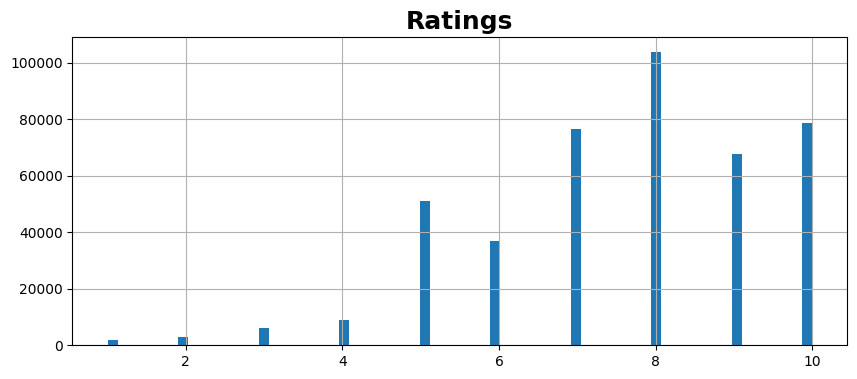

In [37]:
plt.figure(figsize=(10,4))
ratings['Book-Rating'].hist(bins=70)
plt.title('Ratings',  fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, 'Ratings Frequency')

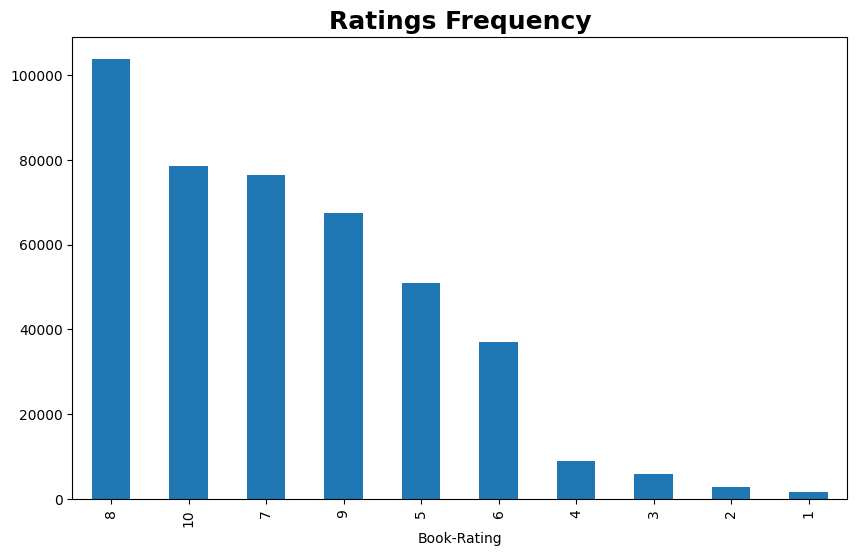

In [38]:
#rating frequency
plt.figure(figsize=(10,6))
ratings['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 18, fontweight = 'bold')

BOOKS

In [39]:
#TOP SELLING BOOKS
top_books = books['Book-Title'].value_counts().head(10)
top_books.index

Index(['Selected Poems', 'Little Women', 'Wuthering Heights',
       'The Secret Garden', 'Dracula', 'Adventures of Huckleberry Finn',
       'Jane Eyre', 'The Night Before Christmas', 'Pride and Prejudice',
       'Great Expectations'],
      dtype='object', name='Book-Title')

Text(0.5, 1.0, 'top 10 selling books')

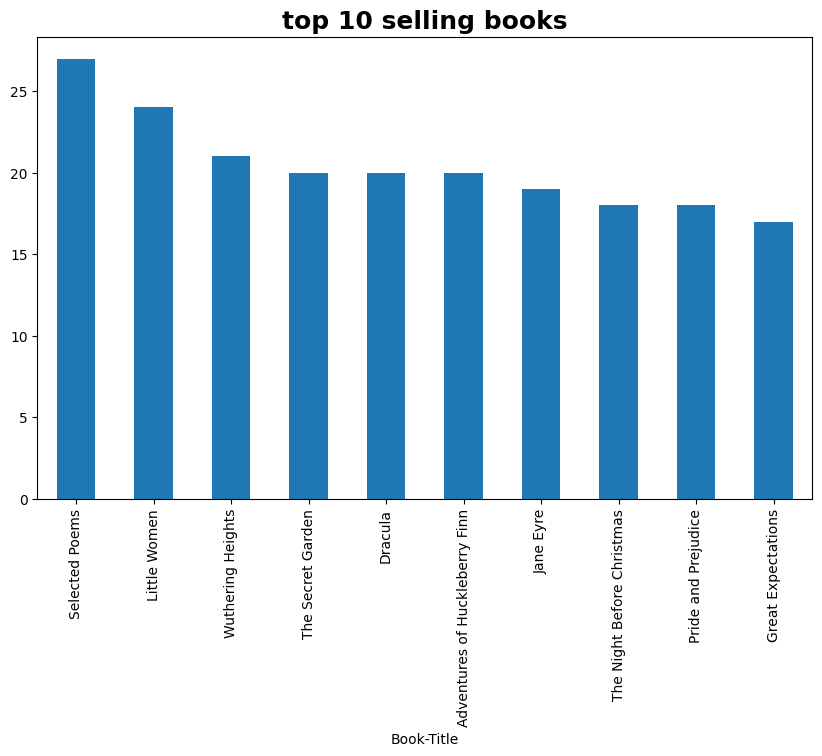

In [40]:
#top selling books

plt.figure(figsize=(10,6))
books['Book-Title'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 selling books',  fontsize = 18, fontweight = 'bold')

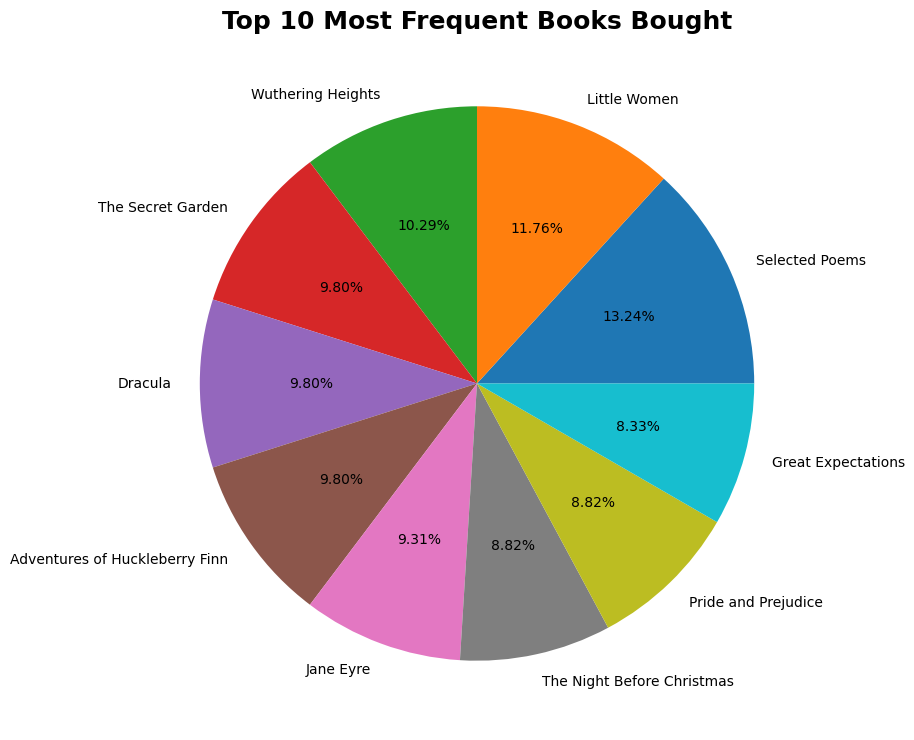

In [41]:
#PIECHART for contributions

plt.figure(figsize = (16,9))
plt.pie(top_books,labels=top_books.index,autopct= '%.2f%%')
plt.title("Top 10 Most Frequent Books Bought", fontsize = 18, fontweight = 'bold')
plt.show()

lets try to visualize some **Explicit Opinions** based on given datasets
basically
- author
- publisher

Text(0.5, 1.0, 'top 10 selling authors')

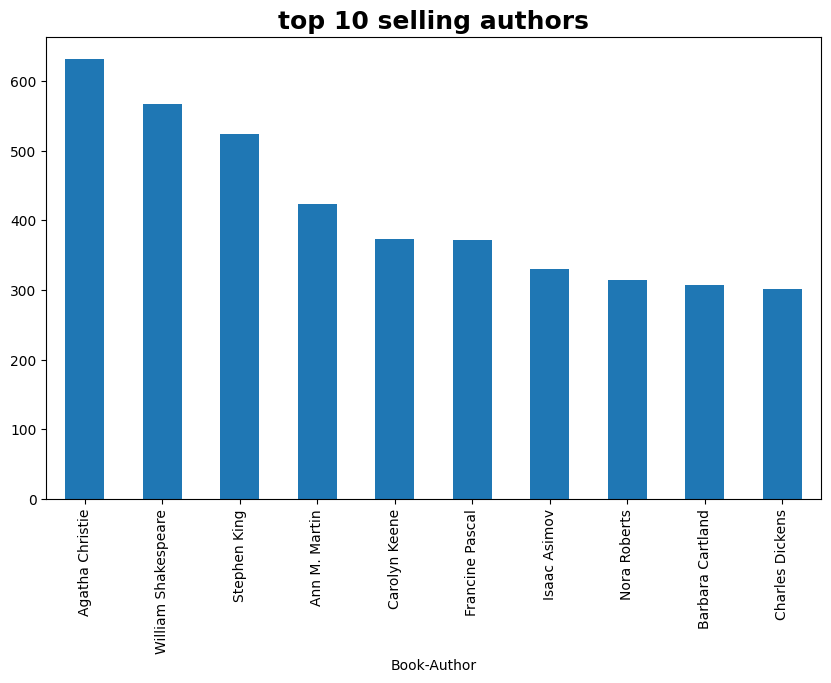

In [42]:
#TOP SELLING AUTHORS

top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10,6))
books['Book-Author'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 selling authors',  fontsize = 18, fontweight = 'bold')

Text(0.5, 1.0, 'Top 10 Most Selling Publishers')

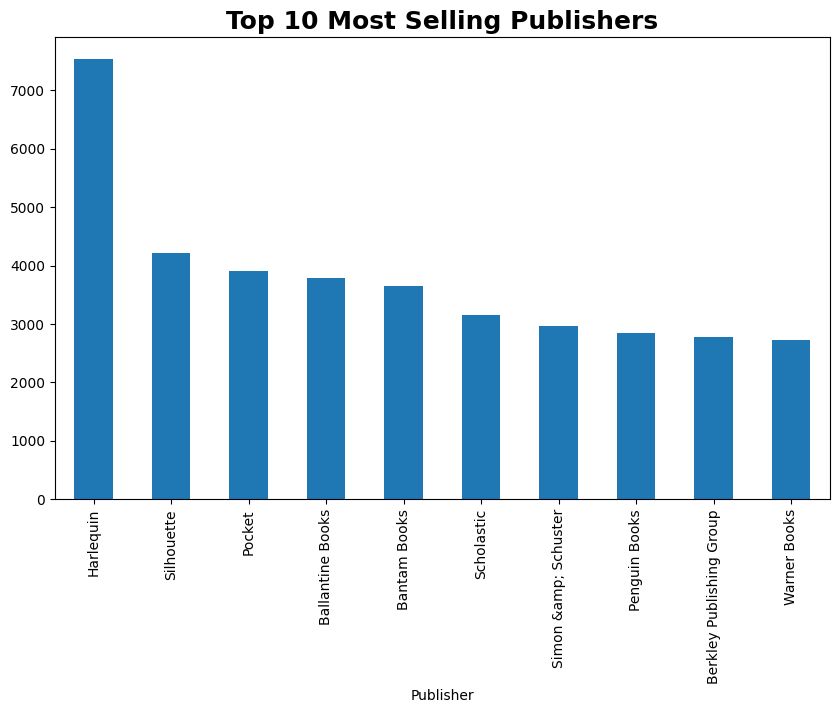

In [43]:
#TOP SELLING PUBLISHERS

top_pub = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(10,6))
books['Publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Selling Publishers',  fontsize = 18, fontweight = 'bold')

USERS

In [44]:
#splitting location for extracting countires

top_country = users['Location'].str.split(',', expand=True)
top_country[2].value_counts().head(10)

2
 usa               139187
 canada             21558
 united kingdom     18286
 germany            17022
 spain              13095
 australia          11723
 italy              11242
                     4598
 france              3442
 portugal            3306
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Country')

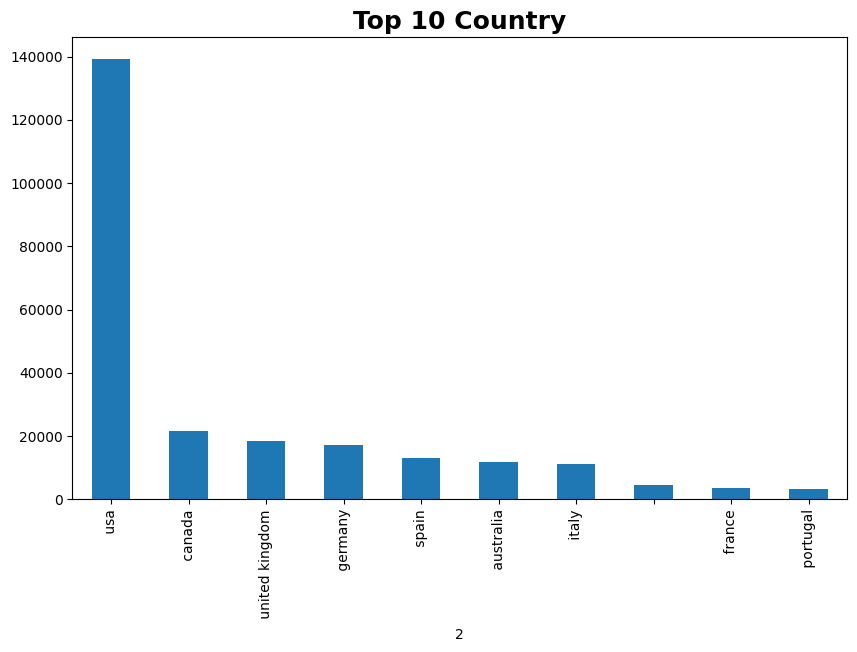

In [45]:
#TOP COUNTRIES

top_con = top_country[2].value_counts().head(10)

plt.figure(figsize=(10,6))
top_country[2].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Country',  fontsize = 18, fontweight = 'bold')

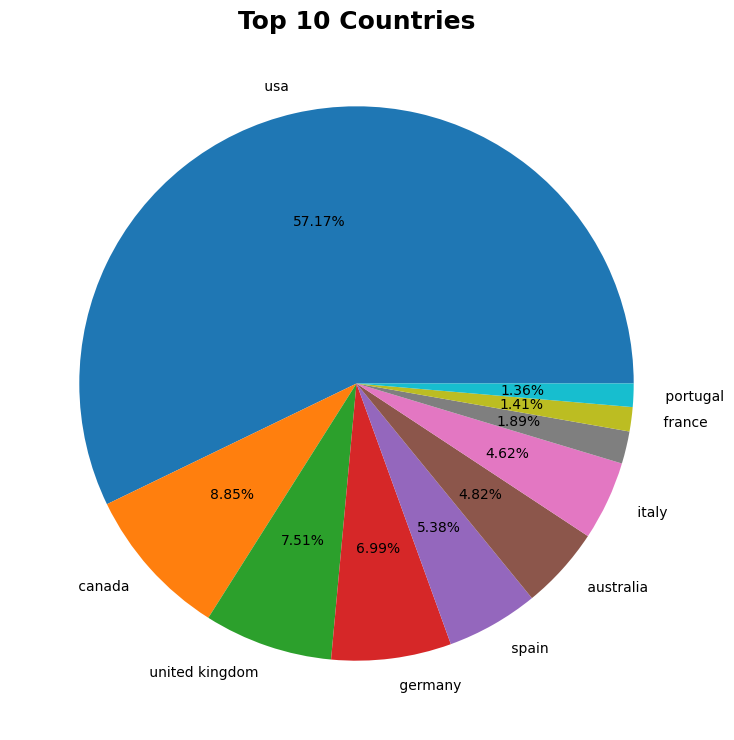

In [46]:
#TOP COUNTRIES contribution

plt.figure(figsize = (12,9))
plt.pie(top_con,labels=top_con.index,autopct= '%.2f%%')
plt.title("Top 10 Countries", fontsize = 18, fontweight = 'bold')
plt.show()

AGE

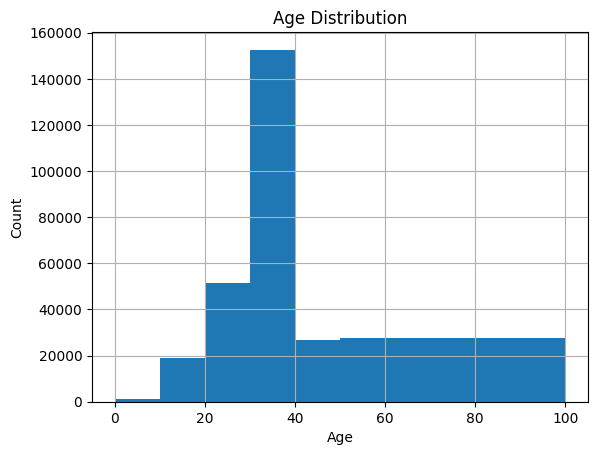

In [47]:
#AGE GROUPS
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

observations :

- most users of age group 20 to 40

Text(0.5, 1.0, 'Age Distribution Plot')

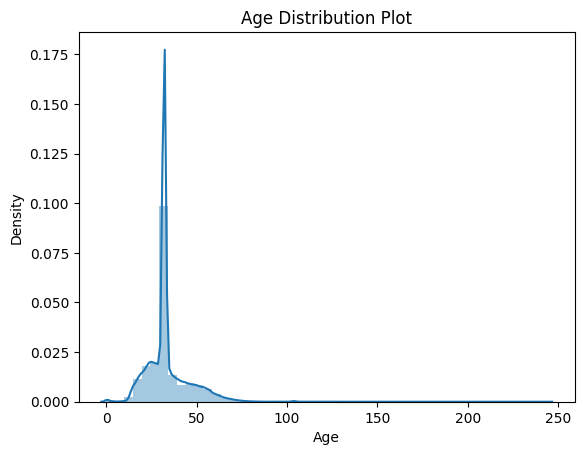

In [48]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

Age Group Analysis

In [49]:
df=users.copy()

In [50]:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [51]:
x=df['age_group'].dropna()

In [52]:
x.value_counts()

age_group
30-40    151015
20-30     52261
40-50     25898
0-20      23603
50-60     17596
60+        7703
Name: count, dtype: int64

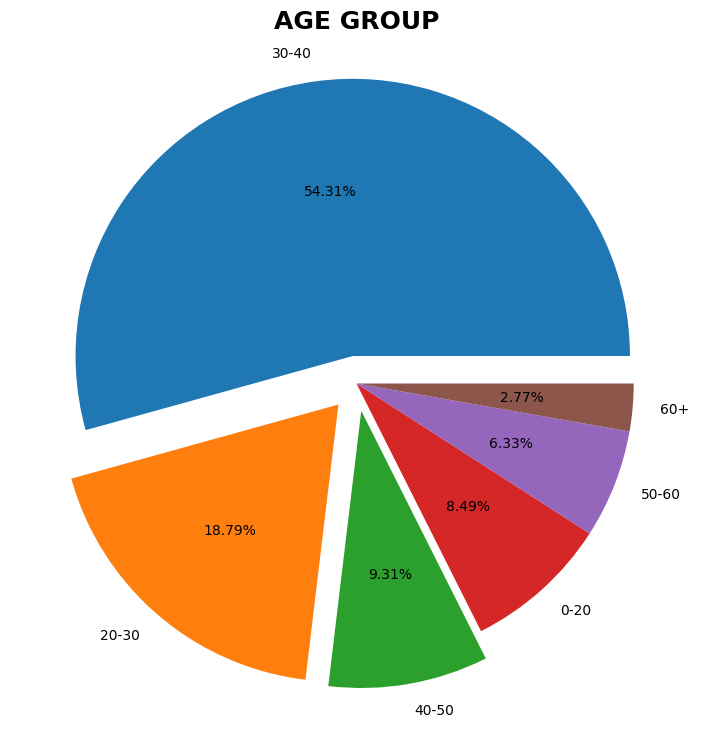

In [53]:
#age group

plt.figure(figsize = (10,9))
plt.pie(x.value_counts(),labels=x.value_counts().index,autopct= '%.2f%%', explode = [0.1,0.1,0.1,0.0,0.0,0.0])
plt.title("AGE GROUP", fontsize = 18, fontweight = 'bold')
plt.show()

# DATA WRANGLING

In [54]:
#MERGING BOOKS AND RATING
merge1=ratings.merge(books,on="ISBN")
merge1.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...


In [55]:
#MERGING USERS Dataset
merge2=merge1.merge(users,on="User-ID")
merge2.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0


In [56]:
final_df=merge2.copy()

In [57]:
final_df.shape

(383842, 12)

In [58]:
final_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Location', 'Age'],
      dtype='object')

### HYPOTHESIS TESTING

In [59]:
#AGE VS RATING
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x=age and y=ratings
pearsonr(final_df['Age'],final_df['Book-Rating'])

PearsonRResult(statistic=0.033543988257198204, pvalue=5.56323826956682e-96)

In [60]:
#AGE vs YOP
pearsonr(final_df['Year-Of-Publication'],final_df['Age'])

PearsonRResult(statistic=0.016388893373000722, pvalue=3.168010200671751e-24)

# RATING FREQUENCY CUTOFF

### RATING FREQUECY > 50  

In [97]:
i = final_df.groupby("Book-Title").count()["Book-Rating"]>50
top_books = i[i].index

In [98]:
final_ratings = final_df[final_df["Book-Title"].isin(top_books)]

In [99]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",32.0
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"n/a, n/a, n/a",32.0
7,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,"n/a, n/a, n/a",32.0
13,11676,0440498058,8,A Wrinkle In Time,MADELEINE L'ENGLE,1998,Yearling,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...,"n/a, n/a, n/a",32.0
25,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,"n/a, n/a, n/a",32.0


### UTILITY MATRIX

In [100]:
ut=final_ratings.pivot_table(index="User-ID",columns="Book-Title",values="Book-Rating")

In [101]:
ut.fillna(0,inplace=True)
ut.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),A Darkness More Than Night,...,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
ut.shape

(24570, 626)

obseravtions:
- books = 626 popular books
- users compared = 24570

# Collaborative Filtering



### User-based: measure the similarity between target users and other users

In [67]:
user_sim = 1 - pairwise_distances( ut.values,metric='cosine')

In [68]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)


In [69]:
user_sim_df.shape

(2019, 2019)

In [70]:
#Set the index and column names to user ids
user_sim_df.index = ut.index
user_sim_df.columns = ut.index

In [71]:
user_sim_df

User-ID,254,507,638,709,882,899,1075,1211,1435,1486,...,276925,277042,277427,277439,277752,277803,277958,278176,278541,278633
User-ID,,,,,,,,,,,,,,,,,,,,,
254,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.710669,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.000000
507,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.710669,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.000000
638,0.0,0.0,1.000000,0.707107,0.707107,0.0,0.703526,0.707107,0.0,0.0,...,0.707107,0.0,0.707107,0.707107,0.707107,0.0,0.0,0.0,0.0,0.707107
709,0.0,0.0,0.707107,1.000000,0.000000,0.0,0.497468,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000
882,0.0,0.0,0.707107,0.000000,1.000000,0.0,0.497468,1.000000,0.0,0.0,...,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277803,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.710669,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.000000
277958,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.710669,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,1.0,0.000000
278176,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,1.0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000


In [72]:
user_sim_df[254]

User-ID
254       1.0
507       1.0
638       0.0
709       0.0
882       0.0
         ... 
277803    1.0
277958    1.0
278176    0.0
278541    1.0
278633    0.0
Name: 254, Length: 2019, dtype: float64

In [73]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

User-ID,254,507,638,709,882
User-ID,,,,,
254,0.0,1.0,0.000000,0.000000,0.000000
507,1.0,0.0,0.000000,0.000000,0.000000
638,0.0,0.0,0.000000,0.707107,0.707107
709,0.0,0.0,0.707107,0.000000,0.000000
882,0.0,0.0,0.707107,0.000000,0.000000


### FECTCHING RECOMMENDATION

In [74]:
def rec_user(customer_id):
    try :
      tem = list(user_sim_df.sort_values([customer_id],ascending=False).head(100).index)
      movie_list=[]
      for i in tem:
        #read by user
          movie_list=movie_list+list(final_df[final_df['User-ID']==i]['Book-Title'])
        #not read by user
          nr=set(movie_list)-set(final_df[final_df['User-ID']==customer_id]['Book-Title'])
          nr=list(nr)
      return nr[:5]

    except :
        return " the user is banned for voilation of rules"

In [75]:
rec_user(254)

["Chicken Soup for the Grandparent's Soul: Stories to Open the Hearts and Rekindle the Spirits of Grandparents",
 'Under the Duvet : Shoes, Reviews, Having the Blues, Builders, Babies, Families and Other Calamities',
 'An Unquiet Mind',
 'The Thirteen Days of Christmas',
 'Apple butter &amp; other plays for children (Talonplays)']

In [76]:
rec_user(22625)

['An Unquiet Mind',
 'The Glass Harmonica',
 'Jazz (Plume Contemporary Fiction)',
 "10 Bad Choices That Ruin Black Women's Lives",
 "John Train's Most Remarkable Occurrences"]

In [77]:
rec_user(666)

' the user is banned for voilation of rules'

In [78]:
'''def eval(user_id):

  #list of all books
  list=final_df[final_df['User-ID']==user_id]['Book-Title']


  #read out of 626
  r=all_books[all_books.isin(list)]
  #so recommend similar books

  #not read out of 626
  nr=all_books[~all_books.isin(list)]


 #recc based on similarity if books/items
  rec_list=[]
  for i in r:
    a=rec(i) #reccomnedation function
    rec_list.append(a)
    # more than 5 vs less than 5]
  m5=[]
  l5=[]
  for i in rec_list:
    if final_df[final_df['Book-Title']==i]['Book-Rating'].mean() > 5 :
      m5.append(i)
    else:
      l5.append(i)
  print('-------------------------------------')
  print(' no of books read = ',len(r))
  print('-------------------------------------')
  print(' no of books not read = ', len(nr))
  print('-------------------------------------')
  print(' recommended books rating > 5 = ',len(m5))
  print('-------------------------------------')
  print(' rec books rating less than 5 = ', len(l5))
  print('-------------------------------------')


'''

"def eval(user_id):\n\n  #list of all books\n  list=final_df[final_df['User-ID']==user_id]['Book-Title']\n\n\n  #read out of 626\n  r=all_books[all_books.isin(list)]\n  #so recommend similar books\n\n  #not read out of 626\n  nr=all_books[~all_books.isin(list)]\n\n\n #recc based on similarity if books/items\n  rec_list=[]\n  for i in r:\n    a=rec(i) #reccomnedation function\n    rec_list.append(a)\n    # more than 5 vs less than 5]\n  m5=[]\n  l5=[]\n  for i in rec_list:\n    if final_df[final_df['Book-Title']==i]['Book-Rating'].mean() > 5 :\n      m5.append(i)\n    else:\n      l5.append(i)\n  print('-------------------------------------')\n  print(' no of books read = ',len(r))\n  print('-------------------------------------')\n  print(' no of books not read = ', len(nr))\n  print('-------------------------------------')\n  print(' recommended books rating > 5 = ',len(m5))\n  print('-------------------------------------')\n  print(' rec books rating less than 5 = ', len(l5))\n  prin

## MODEL 2
---
- Item-based: measure the similarity between the items that target users rates/ interacts with and other items

In [79]:
i = final_df.groupby("Book-Title").count()["Book-Rating"]>50
top_books = i[i].index
final_ratings = final_df[final_df["Book-Title"].isin(top_books)]

In [80]:
pt=final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [81]:
pt.fillna(0,inplace=True)
pt.head()

User-ID,9,16,26,32,42,51,91,97,99,114,...,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
pt.shape

(626, 24570)

### SIMILARITY
- cosine


In [83]:
similarity_scores= cosine_similarity(pt)

In [84]:
similarity_scores

array([[1.        , 0.02293467, 0.00733891, ..., 0.02271138, 0.03868566,
        0.01593066],
       [0.02293467, 1.        , 0.16344491, ..., 0.01859268, 0.01372143,
        0.05600096],
       [0.00733891, 0.16344491, 1.        , ..., 0.01684612, 0.00947328,
        0.03292053],
       ...,
       [0.02271138, 0.01859268, 0.01684612, ..., 1.        , 0.        ,
        0.        ],
       [0.03868566, 0.01372143, 0.00947328, ..., 0.        , 1.        ,
        0.00848073],
       [0.01593066, 0.05600096, 0.03292053, ..., 0.        , 0.00848073,
        1.        ]])

In [85]:
similarity_scores.shape

(626, 626)

### FECTCHING RECOMMENDATION

In [86]:
def recommend(book_name):

    # index fetch
    index=np.where(pt.index==book_name)[0][0]

    #similar top 10 books
    similar_books = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]

    for i in similar_books:
        print(pt.index[i[0]])

In [87]:
recommend("Harry Potter and the Sorcerer's Stone (Book 1)")

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Two Towers (The Lord of the Rings, Part 2)
The Return of the King (The Lord of the Rings, Part 3)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
The Mists of Avalon
Carolina Moon


In [88]:
recommend('The Fellowship of the Ring (The Lord of the Rings, Part 1)')

The Two Towers (The Lord of the Rings, Part 2)
The Return of the King (The Lord of the Rings, Part 3)
The Hobbit : The Enchanting Prelude to The Lord of the Rings
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
The Silmarillion
The Tale of the Body Thief (Vampire Chronicles (Paperback))


deploy

In [89]:
import pickle

In [90]:
list=user_sim_df.index.tolist()

In [91]:
final_df1=final_df.copy()
final=final_df[final_df['User-ID'].isin(list)]

In [92]:
df=pd.DataFrame()
df['user']=final['User-ID']
df['book']=final['Book-Title']
df['ratings']=final['Book-Rating']

In [93]:
df

,user,book,ratings
4,11676,A Painted House,10
5,11676,Waiting to Exhale,8
6,11676,Birdsong: A Novel of Love and War,8
7,11676,The Girl Who Loved Tom Gordon : A Novel,3
8,11676,Adressat unbekannt.,1
...,...,...,...
328934,8282,The Secret Life of Bees,10
348062,104489,Wuthering Heights,9
348063,104489,The Clan of the Cave Bear (Earth's Children Se...,9
348064,104489,The Da Vinci Code,7


In [96]:
'''#dataset
pickle.dump(user_sim_df,open('sim.pkl','wb'))'''

In [95]:
'''#dataset
pickle.dump(df,open('user.pkl','wb'))'''